In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [22]:
tree = pd.read_csv('tree.csv')
tree = tree.drop('Adult', axis = 1)
tree.head()

,Unnamed: 0,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,0,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,0,Dead
1,1,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,31.0700,5.19,20.52,19.29,33,115.5,0.0,0,Alive
2,2,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,28.1900,3.36,24.74,15.01,18,63.0,1.0,0,Dead
3,3,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,26.1425,-0.71,14.29,12.36,4,14.0,1.0,0,Dead
4,4,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,24.0950,-0.58,10.85,11.20,4,14.0,1.0,0,Dead


In [23]:
def unique(lists):
    unique_list = pd.Series(lists).drop_duplicates().tolist()
    for x in unique_list:
        print(x)

In [24]:
subplot = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
tree['Subplot'] = tree['Subplot'].map(subplot)

species = {'Acer saccharum': 1, 'Quercus alba': 2, 'Quercus rubra': 3, 'Prunus serotina': 4}
tree['Species'] = tree['Species'].map(species)

light = {'Low': 1, 'Med': 2, 'High': 3}
tree['Light_Cat'] = tree['Light_Cat'].map(light)

soil = {'Prunus serotina': 1, 'Quercus rubra': 2, 'Acer rubrum': 3, 'Populus grandidentata': 4,
        'Sterile': 5, 'Acer saccharum': 6, 'Quercus alba': 7}
tree['Soil'] = tree['Soil'].map(soil)

sterile = {'Non-Sterile': 0, 'Sterile': 1}
tree['Sterile'] = tree['Sterile'].map(sterile)

conspecific = {'Sterilized': 1, 'Heterospecific': 2, 'Conspecific': 3}
tree['Conspecific'] = tree['Conspecific'].map(conspecific)

myco = {'AMF': 1, 'EMF': 2}
tree['Myco'] = tree['Myco'].map(myco)

soilmyco = {'AMF': 1, 'EMF': 2, 'Sterile': 3}
tree['SoilMyco'] = tree['SoilMyco'].map(soilmyco)

alive = {'Alive': 1, 'Dead': 0}
tree['Alive'] = tree['Alive'].map(alive)

In [25]:
tree['PlantDate'] = pd.to_datetime(tree['PlantDate'])

def date_to_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 1
    elif 6 <= month <= 8:
        return 2
    elif 9 <= month <= 11:
        return 3
    else:
        return 4
    
tree['Season'] = tree['PlantDate'].apply(date_to_season)
tree = tree.drop('PlantDate', axis = 1)

In [26]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   int64  
 3   Species      2783 non-null   int64  
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   int64  
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   int64  
 8   Sterile      2783 non-null   int64  
 9   Conspecific  2783 non-null   int64  
 10  Myco         2783 non-null   int64  
 11  SoilMyco     2783 non-null   int64  
 12  AMF          2783 non-null   float64
 13  EMF          2782 non-null   float64
 14  Phenolics    2783 non-null   float64
 15  Lignin       2783 non-null   float64
 16  NSC          2783 non-null   float64
 17  Census       2783 non-null   int64  
 18  Time         2783 non-null   float64
 19  Event 

In [27]:
pd.set_option('display.max_columns', None)
column_to_move = 'Alive'
tree['Alive'] = tree.pop(column_to_move)
tree = tree.drop('Census', axis = 1)
tree = tree.drop('Harvest', axis = 1)
tree = tree.drop('Event', axis = 1)
tree = tree.drop('Plot', axis = 1)
tree = tree.drop('Subplot', axis = 1)
tree = tree.drop('Myco', axis = 1)
tree = tree.drop('AMF', axis = 1)
tree = tree.drop('EMF', axis = 1)
tree = tree.drop('Time', axis = 1)
tree.head()

,Unnamed: 0,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,SoilMyco,Phenolics,Lignin,NSC,Season,Alive
0,0,1,0.106,2,2017,1,0,2,1,-0.56,13.86,12.15,2,0
1,1,2,0.106,2,2017,2,0,2,2,5.19,20.52,19.29,1,1
2,2,3,0.106,2,2017,1,0,2,1,3.36,24.74,15.01,1,0
3,3,1,0.080,2,2016,1,0,2,1,-0.71,14.29,12.36,2,0
4,4,1,0.060,1,2017,1,0,2,1,-0.58,10.85,11.20,2,0


In [28]:
X = tree.iloc[:, 0:13]
y = tree.iloc[:, -1]
y_label = y.values

columns_list = X.columns.tolist()
tree = pd.DataFrame(X, columns = columns_list)
tree['Alive'] = y_label
tree.groupby('Alive').mean() 
print(X)

      Unnamed: 0  Species  Light_ISF  Light_Cat  Core  Soil  Sterile  \
0              0        1      0.106          2  2017     1        0   
1              1        2      0.106          2  2017     2        0   
2              2        3      0.106          2  2017     1        0   
3              3        1      0.080          2  2016     1        0   
4              4        1      0.060          1  2017     1        0   
...          ...      ...        ...        ...   ...   ...      ...   
2778        2778        4      0.111          2  2017     4        0   
2779        2779        2      0.118          2  2017     3        0   
2780        2780        2      0.118          2  2017     2        0   
2781        2781        2      0.161          3  2017     5        1   
2782        2782        4      0.141          3  2016     4        0   

      Conspecific  SoilMyco  Phenolics  Lignin    NSC  Season  
0               2         1      -0.56   13.86  12.15       2  
1      

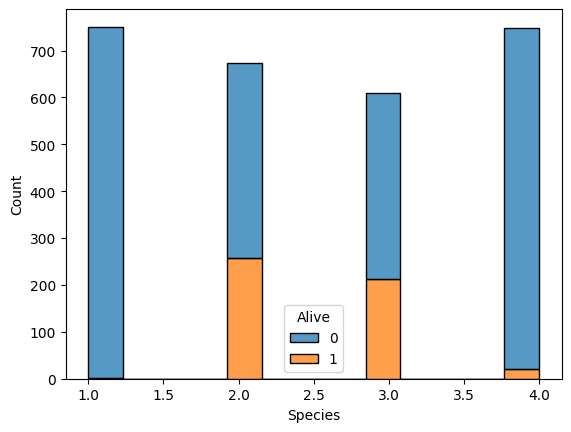

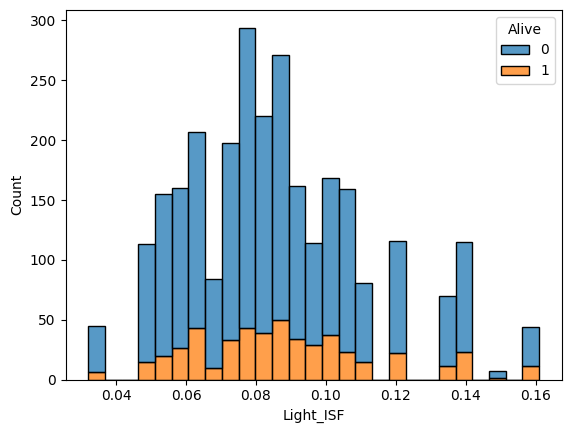

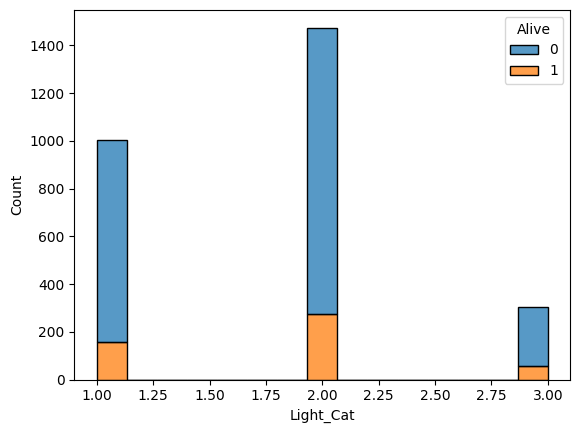

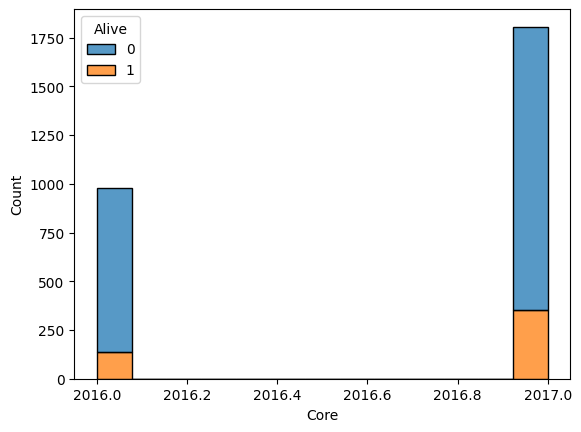

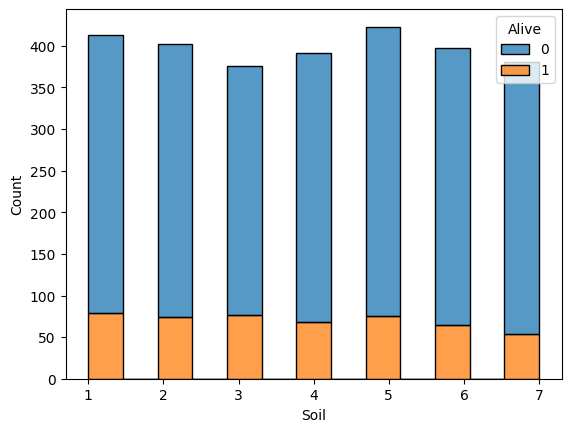

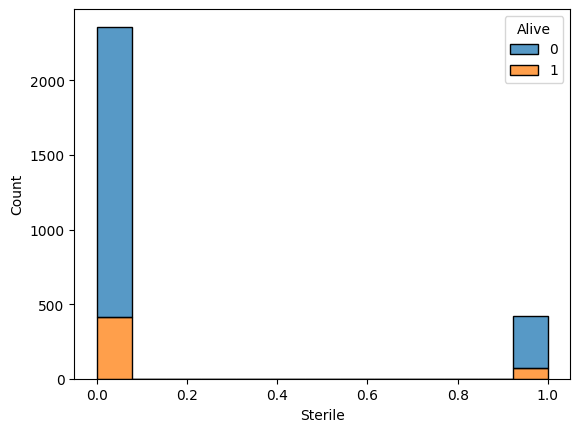

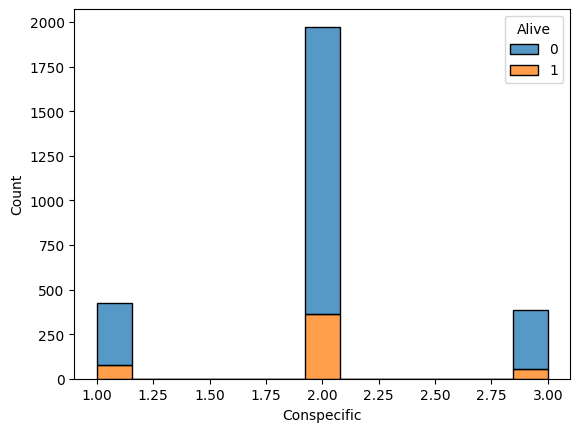

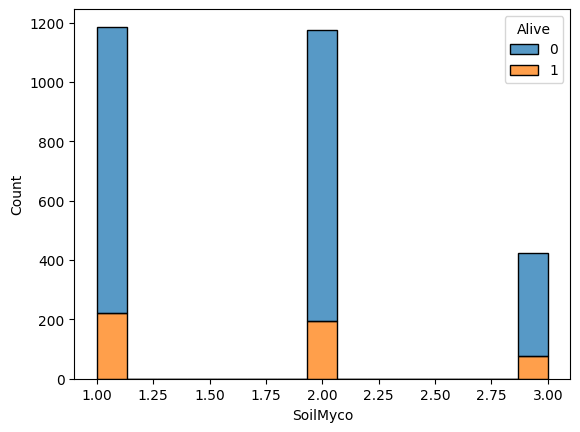

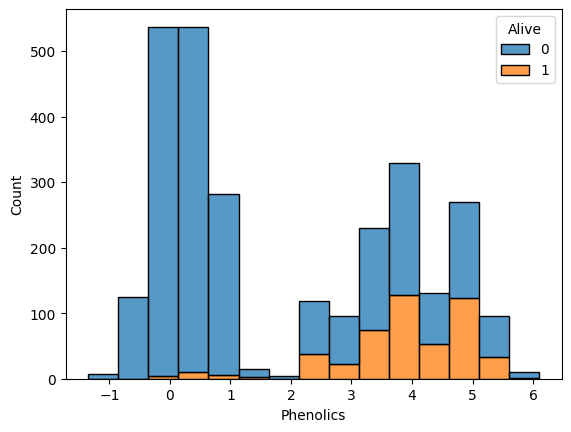

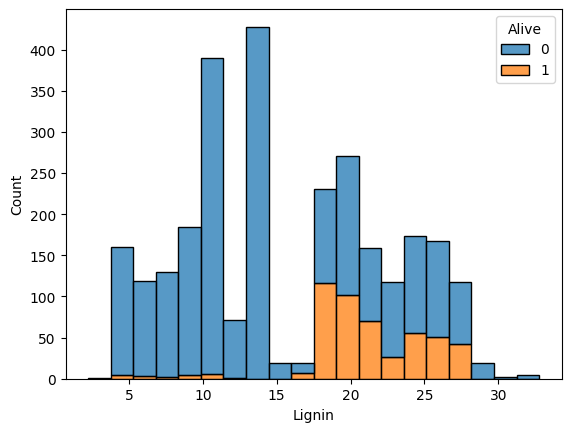

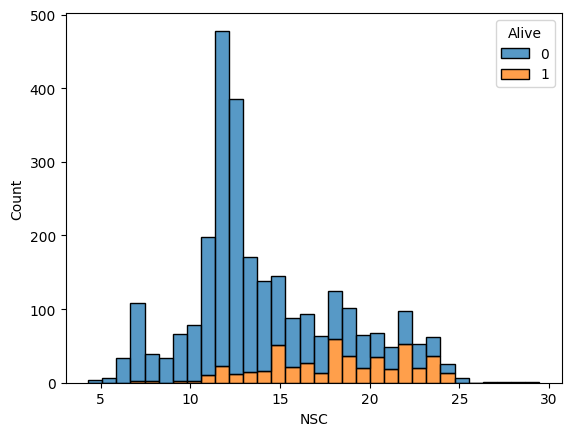

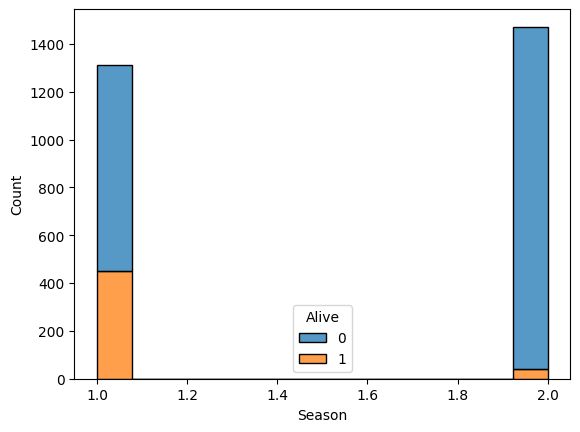

In [29]:
#sb.histplot(data = tree, x = "Plot", hue = "Alive", multiple = "stack")
#plt.show()
#sb.histplot(data = tree, x = "Subplot", hue = "Alive", multiple = "stack")
#plt.show()
sb.histplot(data = tree, x = "Species", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Light_ISF", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Light_Cat", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Core", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Soil", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Sterile", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Conspecific", hue = "Alive", multiple = "stack")
plt.show()
#sb.histplot(data = tree, x = "Myco", hue = "Alive", multiple = "stack")
#plt.show()
sb.histplot(data = tree, x = "SoilMyco", hue = "Alive", multiple = "stack")
plt.show()
#sb.histplot(data = tree, x = "AMF", hue = "Alive", multiple = "stack")
#plt.show()
#sb.histplot(data = tree, x = "EMF", hue = "Alive", multiple = "stack")
#plt.show()
sb.histplot(data = tree, x = "Phenolics", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "Lignin", hue = "Alive", multiple = "stack")
plt.show()
sb.histplot(data = tree, x = "NSC", hue = "Alive", multiple = "stack")
plt.show()
#sb.histplot(data = tree, x = "Census", hue = "Alive", multiple = "stack")
#plt.show()
#sb.histplot(data = tree, x = "Event", hue = "Alive", multiple = "stack")
#plt.show()
#sb.histplot(data = tree, x = "Harvest", hue = "Alive", multiple = "stack")
#plt.show()
#sb.histplot(data = tree, x = "Time", hue = "Alive", multiple = "stack")
#plt.show()
sb.histplot(data = tree, x = "Season", hue = "Alive", multiple = "stack")
plt.show()

In [30]:
X = tree.iloc[:, 0:13]
y = tree.iloc[:, -1]
y_label = y.values

columns_list = X.columns.tolist()
tree = pd.DataFrame(X, columns = columns_list)
tree['Alive'] = y_label
tree.groupby('Alive').mean() 

,Unnamed: 0,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,SoilMyco,Phenolics,Lignin,NSC,Season
Alive,,,,,,,,,,,,,
0,1396.76178,2.482548,0.085197,1.737347,2016.634380,4.015271,0.151832,1.993455,1.730366,1.515611,14.620803,13.408944,1.624346
1,1364.10387,2.511202,0.088088,1.798371,2016.716904,3.808554,0.152749,1.955193,1.704684,3.881976,21.076619,18.003992,1.083503


In [45]:
segment1 = tree[tree['Soil'] <= 4]
segment2 = tree[tree['Soil'] > 4]
fulldata = tree
mms = MinMaxScaler()

,Unnamed: 0,Species,Light_ISF,Light_Cat,Core,Soil,Sterile,Conspecific,SoilMyco,Phenolics,Lignin,NSC,Season,Alive
0,0,1,0.106,2,2017,1,0,2,1,-0.56,13.86,12.15,2,0
1,1,2,0.106,2,2017,2,0,2,2,5.19,20.52,19.29,1,1
2,2,3,0.106,2,2017,1,0,2,1,3.36,24.74,15.01,1,0
3,3,1,0.080,2,2016,1,0,2,1,-0.71,14.29,12.36,2,0
4,4,1,0.060,1,2017,1,0,2,1,-0.58,10.85,11.20,2,0


In [52]:
segment1_means = segment1.mean()
segment2_means = segment2.mean()

feature_differences = segment1_means - segment2_means
print("Feature Differences between segments:")
print(feature_differences)

Feature Differences between segments:
Unnamed: 0     70.119082
Species        -0.013752
Light_ISF       0.000072
Light_Cat       0.005104
Core            0.045959
Soil           -3.494106
Sterile        -0.352206
Conspecific     0.316434
SoilMyco       -0.520384
Phenolics      -0.058695
Lignin         -0.140719
NSC             0.019699
Season          0.095560
Alive           0.026205
dtype: float64


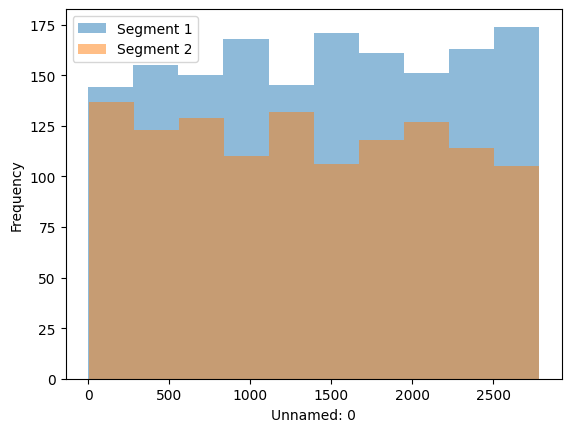

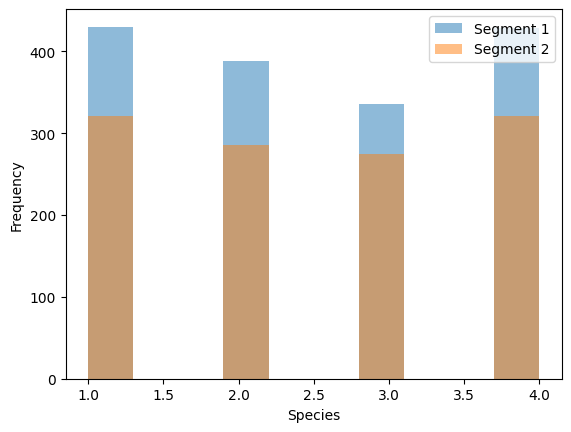

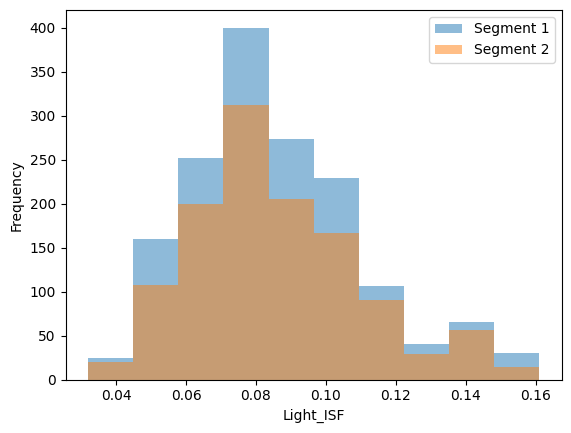

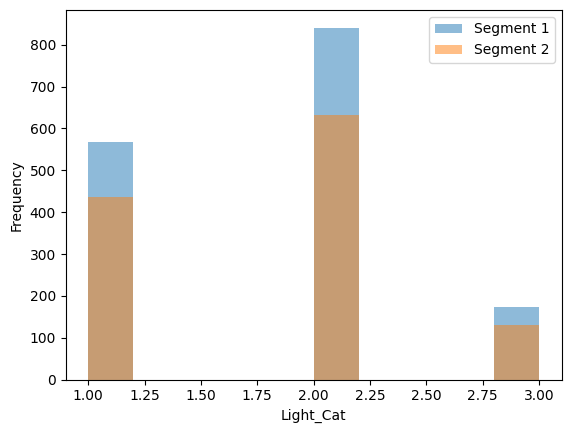

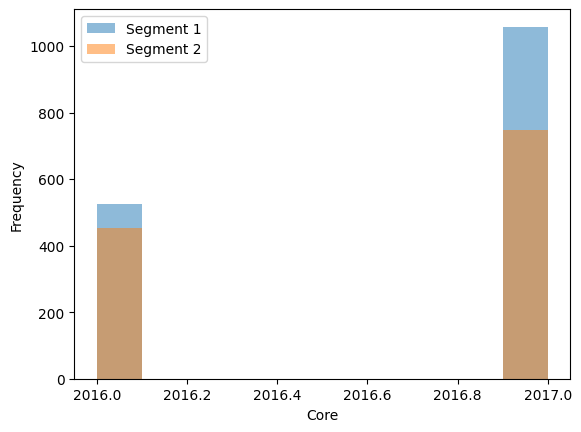

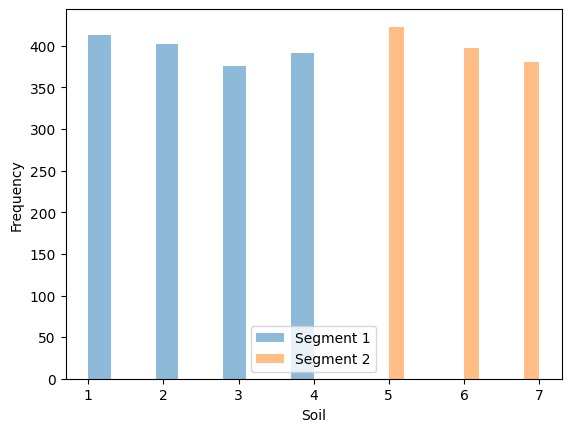

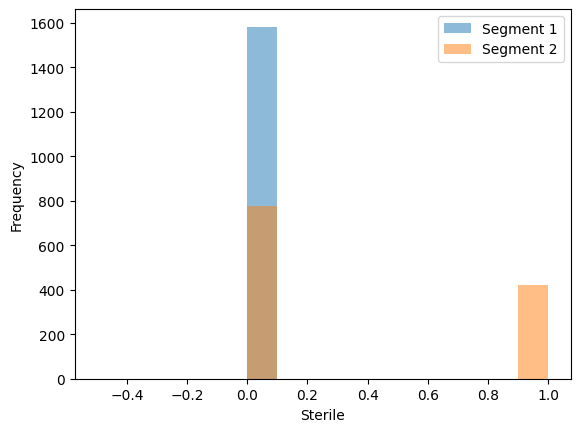

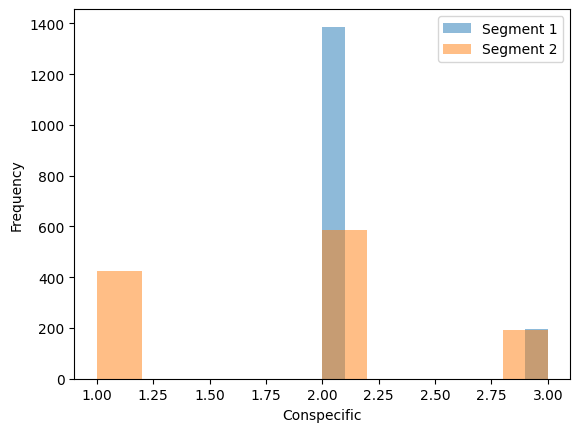

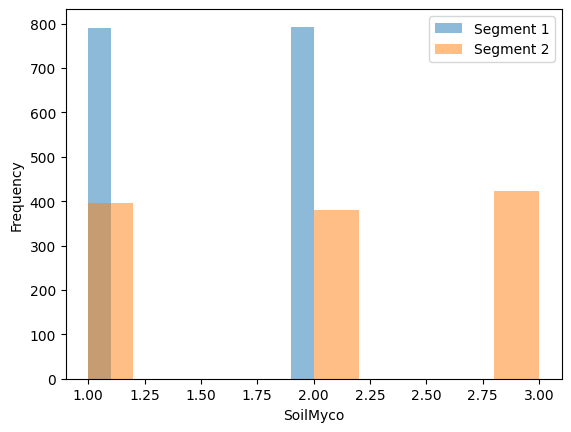

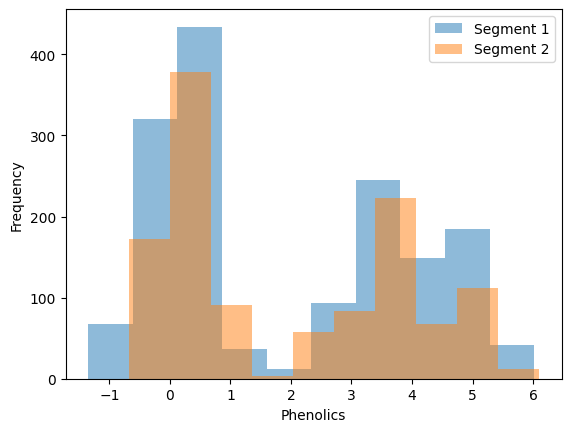

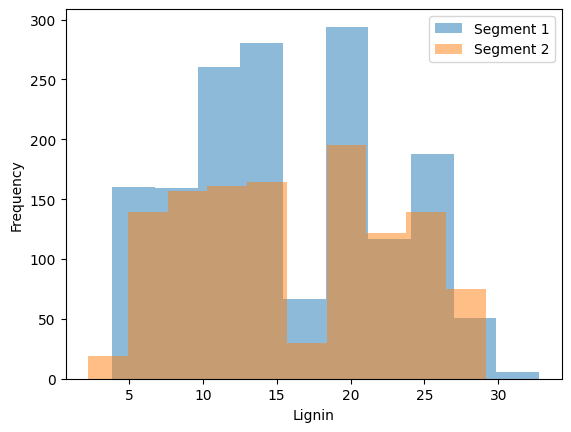

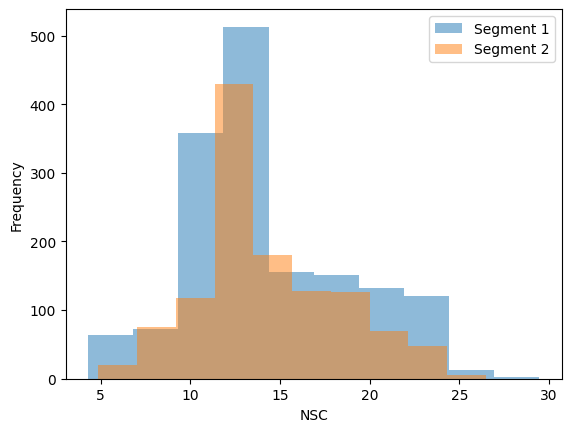

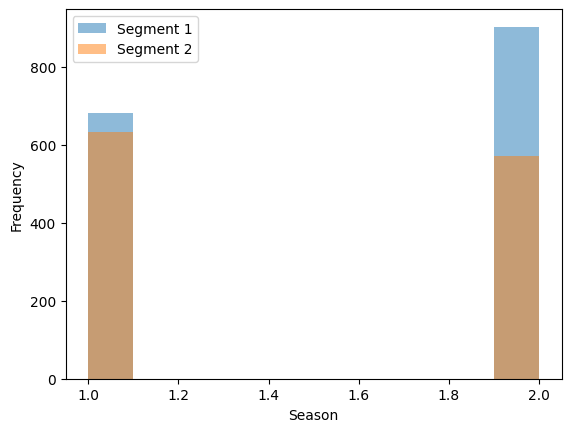

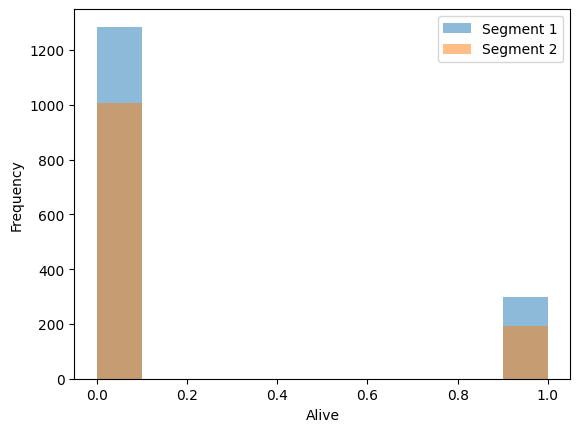

In [51]:
for feature in tree.columns:
    plt.figure()
    plt.hist(segment1[feature], alpha = 0.5, label='Segment 1')
    plt.hist(segment2[feature], alpha = 0.5, label='Segment 2')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [32]:
#Full model
X_full = fulldata.iloc[:, 0:13] 
y_full = fulldata.iloc[:, -1]
X_full = mms.fit_transform(X_full)
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, 
                                                                        y_full, 
                                                                        train_size = 0.5, 
                                                                        stratify = y_full, 
                                                                        random_state = 0)
print(fulldata.groupby('Alive').count())

       Unnamed: 0  Species  Light_ISF  Light_Cat  Core  Soil  Sterile  \
Alive                                                                   
0            2292     2292       2292       2292  2292  2292     2292   
1             491      491        491        491   491   491      491   

       Conspecific  SoilMyco  Phenolics  Lignin   NSC  Season  
Alive                                                          
0             2292      2292       2292    2292  2292    2292  
1              491       491        491     491   491     491  


0.8455459770114943


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

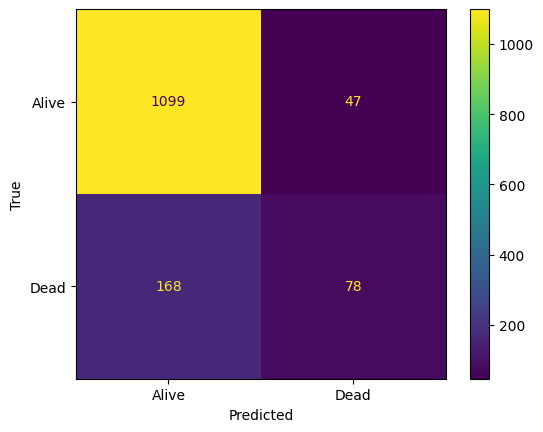

In [33]:
#Full model Tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_full_train, y_full_train)
y_pred_full = clf.predict(X_full_test)

print(accuracy_score(y_full_test,y_pred_full))
cf_matrix = confusion_matrix(y_full_test,y_pred_full)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [42]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_full_train, y_full_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_full_test, y_full_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.8238673577267217
Test Set Score: 0.8232758620689655


In [34]:
#Segment 1 model: low soil
X_low = segment1.iloc[:, 0:13] 
y_low = segment1.iloc[:, -1]
X_low = mms.fit_transform(X_low)
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low,
                                                                    y_low,
                                                                    train_size = 0.5,
                                                                    stratify = y_low, 
                                                                    random_state = 0)
print(segment1.groupby('Alive').count())

       Unnamed: 0  Species  Light_ISF  Light_Cat  Core  Soil  Sterile  \
Alive                                                                   
0            1285     1285       1285       1285  1285  1285     1285   
1             297      297        297        297   297   297      297   

       Conspecific  SoilMyco  Phenolics  Lignin   NSC  Season  
Alive                                                          
0             1285      1285       1285    1285  1285    1285  
1              297       297        297     297   297     297  


0.8078381795195955


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

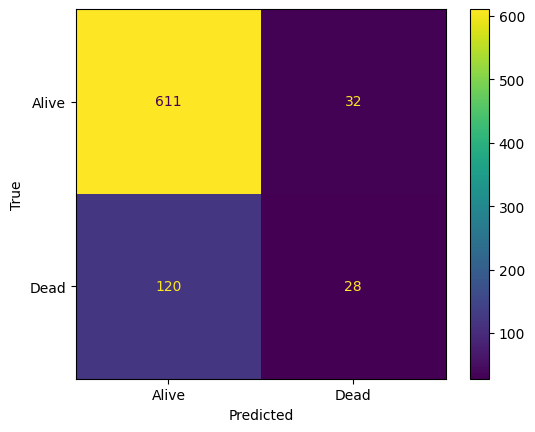

In [35]:
#Segment 1 model tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_low_train, y_low_train)
y_pred_low = clf.predict(X_low_test)

print(accuracy_score(y_low_test,y_pred_low))
cf_matrix = confusion_matrix(y_low_test,y_pred_low)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [44]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_low_train, y_low_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_low_test, y_low_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.8116312395509911
Test Set Score: 0.8128950695322377


In [36]:
#Segment 2 model: higher soil
X_high = segment2.iloc[:, 0:13] 
y_high = segment2.iloc[:, -1]
X_high = mms.fit_transform(X_high)
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high,
                                                                        y_high,
                                                                        train_size = 0.5,
                                                                        stratify = y_high,
                                                                        random_state = 0)
print(segment2.groupby('Alive').count())

       Unnamed: 0  Species  Light_ISF  Light_Cat  Core  Soil  Sterile  \
Alive                                                                   
0            1007     1007       1007       1007  1007  1007     1007   
1             194      194        194        194   194   194      194   

       Conspecific  SoilMyco  Phenolics  Lignin   NSC  Season  
Alive                                                          
0             1007      1007       1007    1007  1007    1007  
1              194       194        194     194   194     194  


0.8469217970049917


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

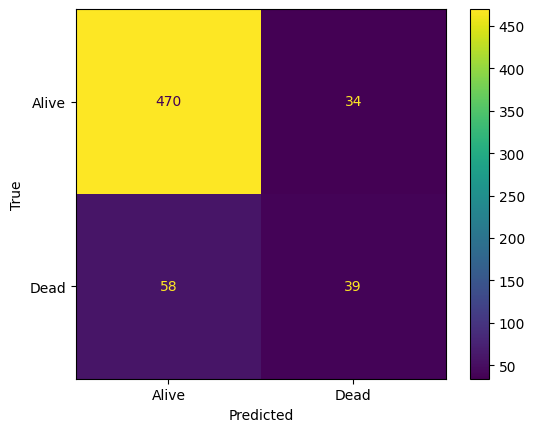

In [37]:
#Segment 2 model Tree
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_high_train, y_high_train)
y_pred_high = clf.predict(X_high_test)

print(accuracy_score(y_high_test,y_pred_high))
cf_matrix = confusion_matrix(y_high_test,y_pred_high)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Alive', 'Dead'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

In [41]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_high_train, y_high_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_high_test, y_high_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.8383333333333333
Test Set Score: 0.8386023294509152
